In [64]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [65]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [66]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[y_train < 5]
x_test = x_test[y_test < 5]
y_train = y_train[y_train < 5]
y_test = y_test[y_test < 5]
num_classes = 5
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples


In [67]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.models import Model
input_shape = (28, 28, 1)

inputs = Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = UpSampling2D(size=(2, 2))(x)  
x = Conv2D(32, kernel_size=(3, 3), activation="relu")(x)  
x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation="softmax")(x)  

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │        10,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,525 (185.64 KB)

 Trainable params: 47,525 (185.64 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=["accuracy"])

model.fit(x_train[:5000], y_train[:5000], batch_size=34, epochs=25, validation_data=(x_test[:5000], y_test[:5000]))

Epoch 1/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6958 - loss: 0.8648 - val_accuracy: 0.9756 - val_loss: 0.0888
Epoch 2/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9582 - loss: 0.1340 - val_accuracy: 0.9840 - val_loss: 0.0573
Epoch 3/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9620 - loss: 0.1084 - val_accuracy: 0.9874 - val_loss: 0.0507
Epoch 4/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9739 - loss: 0.0848 - val_accuracy: 0.9868 - val_loss: 0.0429
Epoch 5/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9788 - loss: 0.0739 - val_accuracy: 0.9884 - val_loss: 0.0411
Epoch 6/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9798 - loss: 0.0682 - val_accuracy: 0.9904 - val_loss: 0.0317
Epoch 7/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9794 - loss: 0.0653 - val_accuracy: 0.9906 - val_loss: 0.0306
Epoch 8/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9791 - loss: 0.0563 - val_accu

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_predict = model.predict(x_test)
predicted = np.argmax(y_predict, axis=1)

161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [70]:
predicted.shape

(5139,)

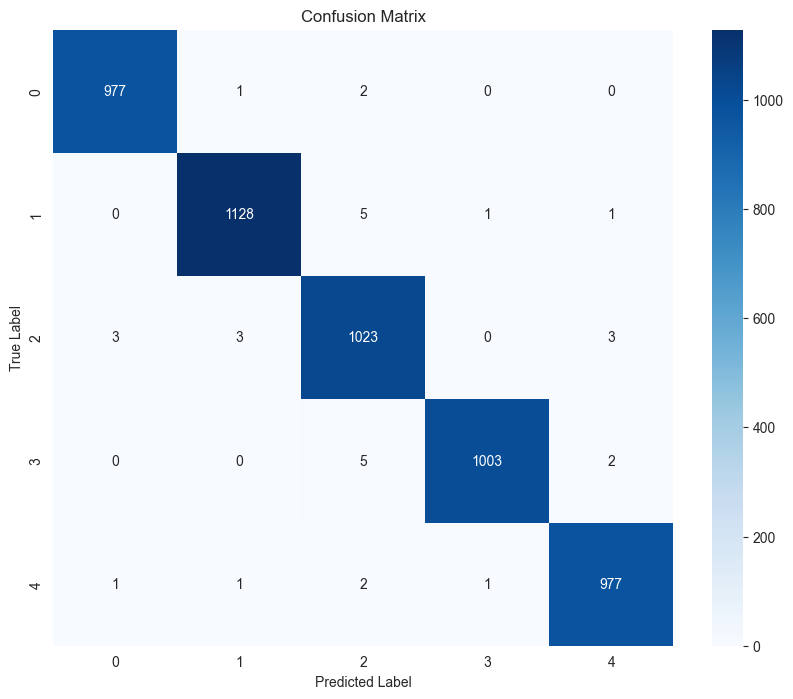

In [71]:
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, predicted)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [72]:
model.save('path_to_save_model.h5')

In [73]:
from keras.models import load_model
from keras.datasets import fashion_mnist 
(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

x_train_f = x_train_f[y_train_f < 5]
x_test_f = x_test_f[y_test_f < 5]
y_train_f = y_train_f[y_train_f < 5]
y_test_f = y_test_f[y_test_f < 5]

num_classes = 5
input_shape = (28, 28, 1)

x_train_f = x_train_f.astype("float32") / 255
x_test_f = x_test_f.astype("float32") / 255

x_train_f = np.expand_dims(x_train_f, -1)
x_test_f = np.expand_dims(x_test_f, -1)

y_train_f = keras.utils.to_categorical(y_train_f, num_classes)
y_test_f = keras.utils.to_categorical(y_test_f, num_classes)

model = load_model('path_to_save_model.h5')
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [74]:
model.fit(x_train_f[:5000], y_train_f[:5000], batch_size=16, epochs=100, validation_data=(x_test_f[:5000], y_test_f[:5000]))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6439 - loss: 0.9546 - val_accuracy: 0.8354 - val_loss: 0.4457
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8457 - loss: 0.4380 - val_accuracy: 0.8658 - val_loss: 0.3710
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8761 - loss: 0.3520 - val_accuracy: 0.8812 - val_loss: 0.3379
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8826 - loss: 0.3294 - val_accuracy: 0.8922 - val_loss: 0.3073
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8876 - loss: 0.2882 - val_accuracy: 0.8970 - val_loss: 0.2934
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9046 - loss: 0.2567 - val_accuracy: 0.9034 - val_loss: 0.2912
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9147 - loss: 0.2376 - val_accuracy: 0.9006 - val_loss: 0.2973
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9175 - loss: 0.2418 - val_a

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


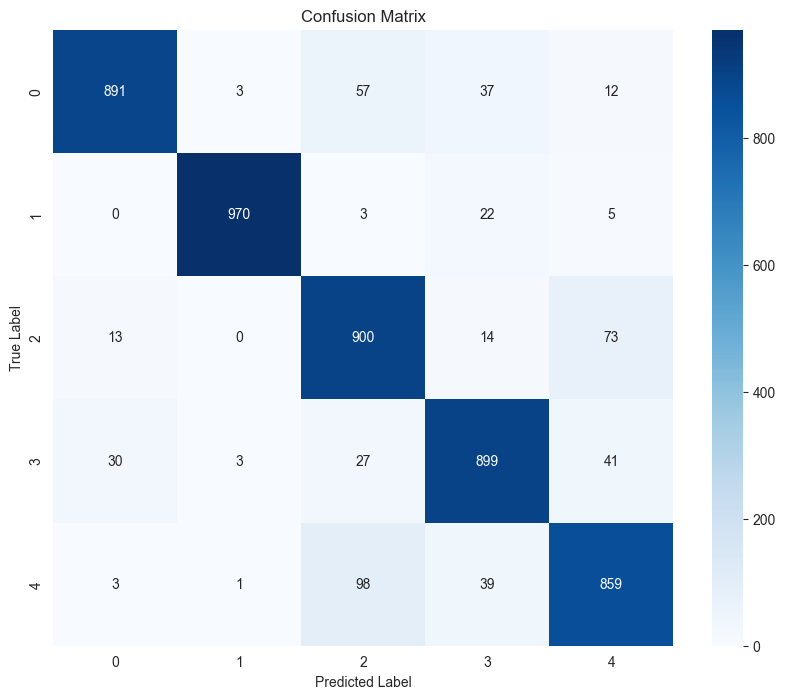

In [75]:
y_predict = model.predict(x_test_f)
predicted = np.argmax(y_predict, axis=1)
y_true = np.argmax(y_test_f, axis=1)
conf_matrix = confusion_matrix(y_true, predicted)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# часть 2

In [76]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [77]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import optuna

In [78]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


input_img = Input(shape=(28, 28, 1))

In [79]:
from keras.layers import UpSampling2D
x = Conv2D(32, (3, 3), activation='selu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='selu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(64, (3, 3), activation='selu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='selu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

autoencoder.fit(x_train[:4000], x_train[:4000],
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test[:4000], x_test[:4000]))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.7614 - loss: 0.3747 - val_accuracy: 0.8202 - val_loss: 0.1286
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.8101 - loss: 0.1174 - val_accuracy: 0.8222 - val_loss: 0.0966
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8128 - loss: 0.0956 - val_accuracy: 0.8229 - val_loss: 0.0885
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8144 - loss: 0.0877 - val_accuracy: 0.8232 - val_loss: 0.0835
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8138 - loss: 0.0838 - val_accuracy: 0.8234 - val_loss: 0.0806
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8151 - loss: 0.0810 - val_accuracy: 0.8235 - val_loss: 0.0781
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8160 - loss: 0.0786 - val_accuracy: 0.8236 - val_loss: 0.0764
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8153 - loss: 0.0771 - val_accuracy: 0.8237 

In [80]:
autoencoder.save('autoencoder.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


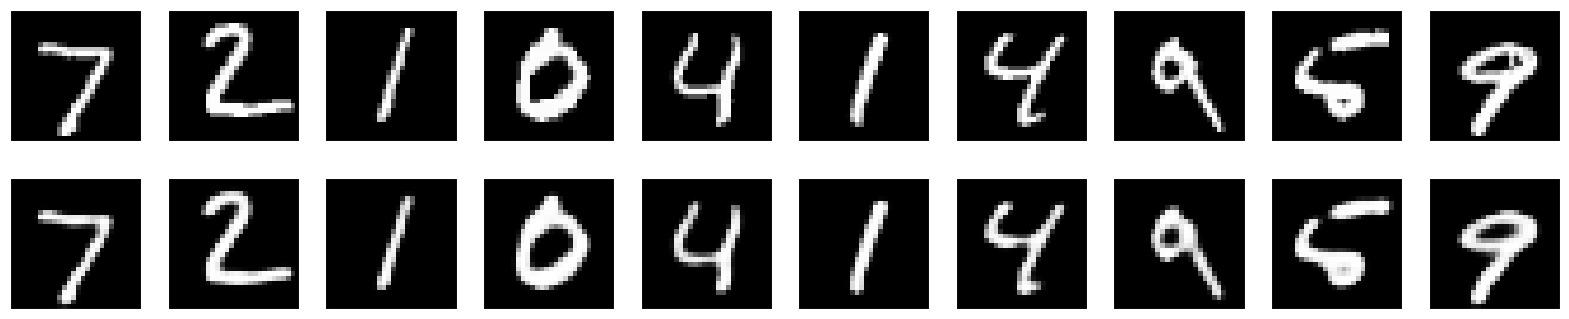

In [81]:
def plot_images(decoded_imgs, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

decoded_imgs = autoencoder.predict(x_test)
plot_images(decoded_imgs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


[I 2024-06-17 01:19:51,139] A new study created in memory with name: no-name-4a922a17-a6a2-4d47-8eac-1d2486e2a273


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:20:05,687] Trial 0 finished with value: 0.9727 and parameters: {'num_layers': 1, 'units_0': 96, 'learning_rate': 0.0006166380555489496}. Best is trial 0 with value: 0.9727.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:20:16,372] Trial 1 finished with value: 0.9766 and parameters: {'num_layers': 3, 'units_0': 64, 'units_1': 96, 'units_2': 128, 'learning_rate': 0.0008814310261036091}. Best is trial 1 with value: 0.9766.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:20:30,745] Trial 2 finished with value: 0.9554 and parameters: {'num_layers': 3, 'units_0': 128, 'units_1': 96, 'units_2': 128, 'learning_rate': 0.008278398930099734}. Best is trial 1 with value: 0.9766.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-17 01:20:41,266] Trial 3 finished with value: 0.9697 and parameters: {'num_layers': 1, 'units_0': 96, 'learning_rate': 0.006326892148705763}. Best is trial 1 with value: 0.9766.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-17 01:20:51,483] Trial 4 finished with value: 0.9692 and parameters: {'num_layers': 1, 'units_0': 96, 'learning_rate': 0.0002625591245645534}. Best is trial 1 with value: 0.9766.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:21:00,856] Trial 5 finished with value: 0.9737 and parameters: {'num_layers': 3, 'units_0': 64, 'units_1': 128, 'units_2': 64, 'learning_rate': 0.0017369430116682552}. Best is trial 1 with value: 0.9766.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-17 01:21:07,660] Trial 6 finished with value: 0.9584 and parameters: {'num_layers': 1, 'units_0': 32, 'learning_rate': 0.0003548241671844367}. Best is trial 1 with value: 0.9766.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-17 01:21:15,136] Trial 7 finished with value: 0.9692 and parameters: {'num_layers': 3, 'units_0': 32, 'units_1': 32, 'units_2': 64, 'learning_rate': 0.004407846112667908}. Best is trial 1 with value: 0.9766.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-17 01:21:23,182] Trial 8 finished with value: 0.9647 and parameters: {'num_layers': 1, 'units_0': 64, 'learning_rate': 0.007499942471466467}. Best is trial 1 with value: 0.9766.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:21:34,459] Trial 9 finished with value: 0.9635 and parameters: {'num_layers': 1, 'units_0': 96, 'learning_rate': 0.000163541479686663}. Best is trial 1 with value: 0.9766.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:21:48,852] Trial 10 finished with value: 0.97 and parameters: {'num_layers': 2, 'units_0': 128, 'units_1': 64, 'learning_rate': 0.0019426136633925552}. Best is trial 1 with value: 0.9766.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:21:59,166] Trial 11 finished with value: 0.9786 and parameters: {'num_layers': 3, 'units_0': 64, 'units_1': 128, 'units_2': 128, 'learning_rate': 0.0012888090008805737}. Best is trial 11 with value: 0.9786.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-17 01:22:08,242] Trial 12 finished with value: 0.9759 and parameters: {'num_layers': 2, 'units_0': 64, 'units_1': 128, 'learning_rate': 0.0008531979882429048}. Best is trial 11 with value: 0.9786.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-17 01:22:19,645] Trial 13 finished with value: 0.9747 and parameters: {'num_layers': 3, 'units_0': 32, 'units_1': 96, 'units_2': 128, 'learning_rate': 0.0022092718811719918}. Best is trial 11 with value: 0.9786.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:22:29,033] Trial 14 finished with value: 0.9747 and parameters: {'num_layers': 2, 'units_0': 64, 'units_1': 128, 'learning_rate': 0.0011728588071158346}. Best is trial 11 with value: 0.9786.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:22:40,400] Trial 15 finished with value: 0.9695 and parameters: {'num_layers': 3, 'units_0': 64, 'units_1': 96, 'units_2': 128, 'learning_rate': 0.0006109847017052003}. Best is trial 11 with value: 0.9786.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-17 01:22:48,462] Trial 16 finished with value: 0.9756 and parameters: {'num_layers': 3, 'units_0': 32, 'units_1': 64, 'units_2': 96, 'learning_rate': 0.0026577936547243206}. Best is trial 11 with value: 0.9786.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:22:57,783] Trial 17 finished with value: 0.9705 and parameters: {'num_layers': 2, 'units_0': 64, 'units_1': 128, 'learning_rate': 0.00043833044899350905}. Best is trial 11 with value: 0.9786.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-17 01:23:09,411] Trial 18 finished with value: 0.9693 and parameters: {'num_layers': 3, 'units_0': 96, 'units_1': 96, 'units_2': 96, 'learning_rate': 0.0012191344834183067}. Best is trial 11 with value: 0.9786.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-06-17 01:23:16,730] Trial 19 finished with value: 0.9735 and parameters: {'num_layers': 2, 'units_0': 32, 'units_1': 64, 'learning_rate': 0.004108378338372358}. Best is trial 11 with value: 0.9786.


Best hyperparameters:  {'num_layers': 3, 'units_0': 64, 'units_1': 128, 'units_2': 128, 'learning_rate': 0.0012888090008805737}
Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8196 - loss: 0.5723
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9561 - loss: 0.1402
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9685 - loss: 0.1043
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9733 - loss: 0.0853
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9739 - loss: 0.0805
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9783 - loss: 0.0670
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9820 - loss: 0.0560
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9817 - loss: 0.0564
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9824 - loss: 0.0560
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9819 - loss: 0.0561
Epoch 11/50

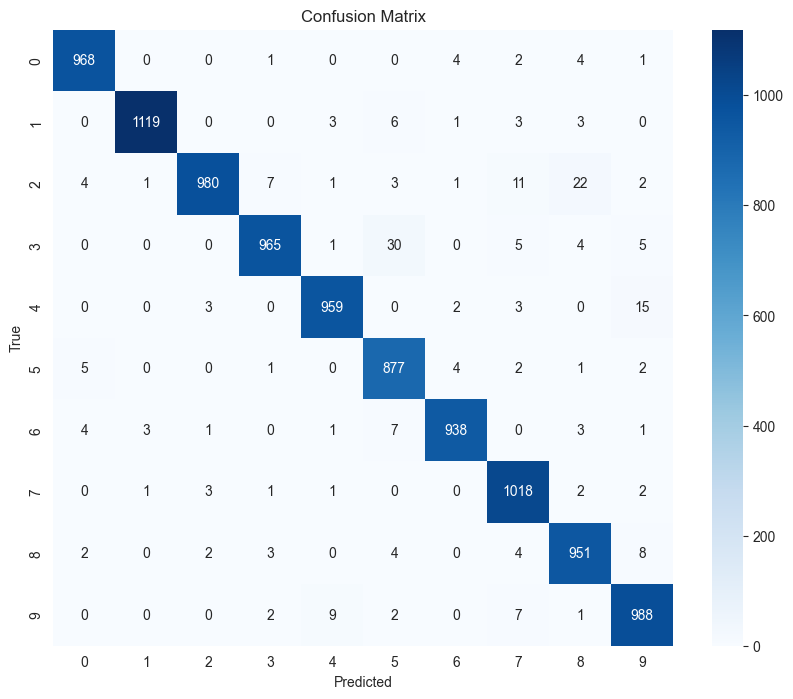

In [82]:
encoder = Model(input_img, encoded)
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test)
def objective(trial):
    model = Sequential()
    model.add(Input(shape=(7, 7, 64)))
    model.add(Flatten())
    num_layers = trial.suggest_int('num_layers', 1, 3)
    for i in range(num_layers):
        units = trial.suggest_int(f'units_{i}', 32, 128, step=32)
        model.add(Dense(units, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(encoded_train, y_train, epochs=5, batch_size=128, verbose=0)
    
    y_pred = model.predict(encoded_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Best hyperparameters: ', study.best_params)

best_model = Sequential()
best_model.add(Input(shape=(7, 7, 64)))
best_model.add(Flatten())

for i in range(study.best_params['num_layers']):
    best_model.add(Dense(study.best_params[f'units_{i}'], activation='relu'))

best_model.add(Dense(10, activation='softmax'))

best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=study.best_params['learning_rate']),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

best_model.fit(encoded_train, y_train, epochs=50, batch_size=128, verbose=1)

y_pred = best_model.predict(encoded_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [83]:
best_model.save('bestmodel_mnist.h5')


In [84]:
(fashion_train, fashion_train_labels), (fashion_test, fashion_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Нормализация данных
fashion_train = fashion_train.astype('float32') / 255.
fashion_test = fashion_test.astype('float32') / 255.

In [86]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)

input_img = Input(shape=(28, 28, 1))  

autoencoder_new = load_model('autoencoder.h5')
autoencoder_new.compile(optimizer=optimizer, loss='binary_crossentropy')
fashion_train = fashion_train.reshape(-1, 28, 28, 1)
fashion_test = fashion_test.reshape(-1, 28, 28, 1)

autoencoder_new.fit(fashion_train[:4000], fashion_train[:4000],
                epochs=30,
                batch_size=128,
                validation_data=(fashion_test[:4000], fashion_test[:4000]))

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 2.2440 - val_loss: 0.4861
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.4018 - val_loss: 0.3469
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.3359 - val_loss: 0.3247
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.3175 - val_loss: 0.3140
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.3077 - val_loss: 0.3090
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.3047 - val_loss: 0.3079
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.3017 - val_loss: 0.3078
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.2958 - val_loss: 0.2972
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.2913 - val_loss: 0.3029
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.2960 - val_loss: 0.2942
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.2850 - val_loss: 0.2925
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss:

In [87]:
decoded_imgs_f = autoencoder_new.predict(fashion_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


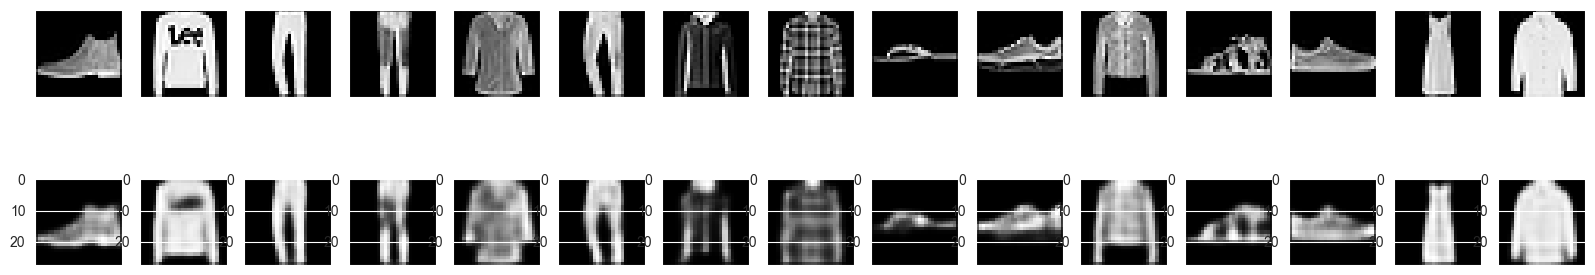

In [88]:
n = 15 
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(fashion_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_f[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)

In [111]:
from tensorflow.keras.models import load_model

classifier_model = load_model('bestmodel_mnist.h5')


In [119]:
(fashion_train, fashion_train_labels), (fashion_test, fashion_test_labels) = tf.keras.datasets.fashion_mnist.load_data()
fashion_train = fashion_train[fashion_train_labels < 5]
fashion_test = fashion_test[fashion_test_labels < 5]
fashion_train_labels = fashion_train_labels[fashion_train_labels < 5]
fashion_test_labels = fashion_test_labels[fashion_test_labels < 5]
X_train = fashion_train.reshape(-1, 7, 7, 64)
X_test = fashion_test.reshape(-1, 7, 7, 64)

In [120]:

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (7500, 7, 7, 64)
Shape of X_test: (1250, 7, 7, 64)


In [121]:
y_train.shape

(60000,)

In [123]:
classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier_model.fit(X_train[:3000], y_train[:3000], epochs=20, batch_size=64, validation_data=(X_test[:1000], y_test[:1000]))
  
    # Предсказание
predictions_new = classifier_model.predict(X_test)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1114 - loss: 2.2993 - val_accuracy: 0.1260 - val_loss: 2.2984
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1120 - loss: 2.3007 - val_accuracy: 0.1260 - val_loss: 2.2985
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1043 - loss: 2.3029 - val_accuracy: 0.1260 - val_loss: 2.2985
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1224 - loss: 2.2967 - val_accuracy: 0.1260 - val_loss: 2.2985
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1050 - loss: 2.3002 - val_accuracy: 0.1260 - val_loss: 2.2984
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1151 - loss: 2.2986 - val_accuracy: 0.1260 - val_loss: 2.2985
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1076 - loss: 2.2986 - val_accuracy: 0.1260 - val_loss: 2.2985
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1110 - loss: 2.2994 - val_accuracy: 0.1260 - val_loss:

In [277]:
y_train.shape

(4000,)

In [273]:
X_test.shape

(1000, 7, 7, 64)

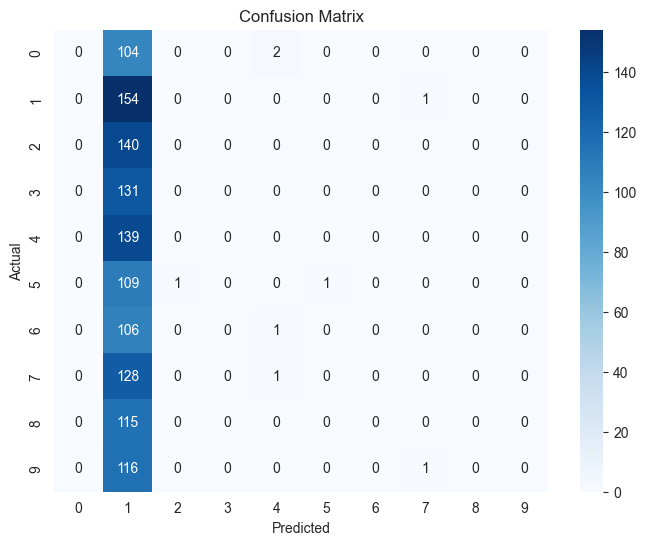

In [117]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions_new, axis=1)
cm = confusion_matrix(y_test[:1250], predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# задание 3

In [5]:
import tensorflow as tf
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.utils import estimator_html_repr

In [24]:
class NeuralNetworkTrainer(BaseEstimator, TransformerMixin):
    def __init__(self, epochs=10, batch_size=64, verbose=1):
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y=None):
        input_shape = (X.shape[1],)
        num_classes = len(np.unique(y))  

        model = tf.keras.models.Sequential([
            tf.keras.layers.Reshape((28, 28, 1), input_shape=input_shape),
            tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
            tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])

        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        self.model = model
        return self

    def transform(self, X):
        return X

    def predict(self, X):
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

    def score(self, X, y=None):
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        accuracy = accuracy_score(y, np.argmax(y_pred, axis=1))
        return accuracy

    def plot_confusion_matrix(self, X, y_true):
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        y_pred_classes = np.argmax(y_pred, axis=1)
        cm = confusion_matrix(y_true, y_pred_classes)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 68s 38ms/step - accuracy: 0.8849 - loss: 0.3723
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.9744 - loss: 0.0864
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 55s 31ms/step - accuracy: 0.9807 - loss: 0.0636
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.9849 - loss: 0.0514
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9857 - loss: 0.0439
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.9878 - loss: 0.0380
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - accuracy: 0.9883 - loss: 0.0358
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 65s 37ms/step - accuracy: 0.9902 - loss: 0.0294
Epoch 9/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9912 - loss: 0.0262
Epoch 10/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - accuracy: 0.9908 - loss: 0.0275
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Accuracy on the test set: 99.07%
438/438 ━━━━━━━━━━━━━━━━━

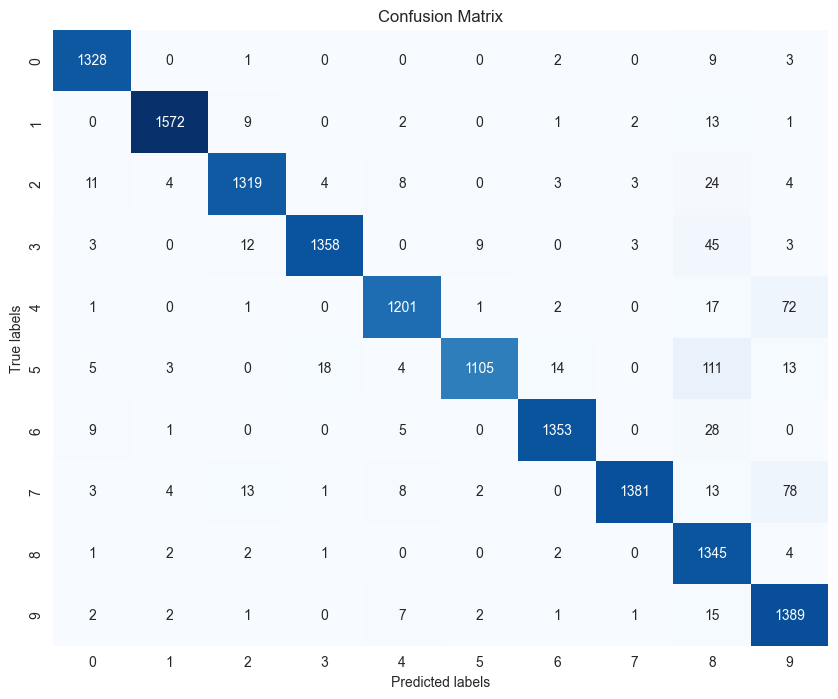

In [25]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, list(range(X.shape[1])))
    ])

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('neural_network_trainer', NeuralNetworkTrainer(epochs=10, batch_size=32))
])


pipe.fit(X_train, y_train)

accuracy = pipe.score(X_test, y_test)
print(f'Accuracy on the test set: {accuracy*100:.2f}%')

pipe.named_steps['neural_network_trainer'].plot_confusion_matrix(X_test, y_test)

In [26]:
from IPython.display import display, HTML
display(HTML(estimator_html_repr(pipe)))

# задание 3 с другой архитектурой 

In [6]:
from keras.layers import Dense, Flatten, BatchNormalization, Normalization, Dropout

In [17]:
class NeuralNetworkTrainer(BaseEstimator, TransformerMixin):
    def __init__(self, epochs=10, batch_size=512, verbose=1):
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y=None):
        input_shape = (X.shape[1],)
        num_classes = len(np.unique(y))  
        normalizer = Normalization()
        model = tf.keras.models.Sequential(
    [   normalizer,
        Flatten(input_shape=input_shape),
        BatchNormalization(),
        Dense(512, activation="selu"),
        Dropout(0.8),
        BatchNormalization(),
        Dense(256, activation="selu"),
        BatchNormalization(),
        Dense(124, activation="selu"),
        BatchNormalization(),
        Dropout(0.8),
        Dense(256, activation="selu"),
        BatchNormalization(),
        Dropout(0.8),
        Dense(num_classes, activation="softmax"),
    ]
)

        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        self.model = model
        return self

    def transform(self, X):
        return X

    def predict(self, X):
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

    def score(self, X, y=None):
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        accuracy = accuracy_score(y, np.argmax(y_pred, axis=1))
        return accuracy

    def plot_confusion_matrix(self, X, y_true):
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        y_pred_classes = np.argmax(y_pred, axis=1)
        cm = confusion_matrix(y_true, y_pred_classes)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

In [18]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, list(range(X.shape[1])))
    ])

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('neural_network_trainer', NeuralNetworkTrainer(epochs=10, batch_size=512))
])


pipe.fit(X_train, y_train)

accuracy = pipe.score(X_test, y_test)
print(f'Accuracy on the test set: {accuracy*100:.2f}%')

pipe.named_steps['neural_network_trainer'].plot_confusion_matrix(X_test, y_test)

C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


InaccessibleTensorError: <tf.Tensor 'sequential_1/normalization_2/Reshape:0' shape=(1, 784) dtype=float32> is out of scope and cannot be used here. Use return values, explicit Python locals or TensorFlow collections to access it.
Please see https://www.tensorflow.org/guide/function#all_outputs_of_a_tffunction_must_be_return_values for more information.

<tf.Tensor 'sequential_1/normalization_2/Reshape:0' shape=(1, 784) dtype=float32> was defined here:
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 641, in run_forever
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1987, in _run_once
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 88, in _run
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    File "C:\Users\User\AppData\Local\Temp\ipykernel_6888\2956143533.py", line 20, in <module>
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\sklearn\pipeline.py", line 476, in fit
    File "C:\Users\User\AppData\Local\Temp\ipykernel_6888\2215374666.py", line 35, in fit
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\layers\layer.py", line 771, in __call__
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\layers\layer.py", line 1279, in _maybe_build
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\layers\layer.py", line 223, in build_wrapper
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\models\sequential.py", line 183, in build
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\layers\layer.py", line 771, in __call__
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\layers\layer.py", line 1279, in _maybe_build
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\layers\layer.py", line 223, in build_wrapper
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\layers\preprocessing\normalization.py", line 185, in build
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\layers\preprocessing\normalization.py", line 289, in finalize_state
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\ops\numpy.py", line 4415, in reshape
    File "C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 1778, in reshape

The tensor <tf.Tensor 'sequential_1/normalization_2/Reshape:0' shape=(1, 784) dtype=float32> cannot be accessed from FuncGraph(name=one_step_on_iterator, id=1833464397248), because it was defined in FuncGraph(name=one_step_on_data, id=1833464390848), which is out of scope.